In [33]:
import os
import sys
import librosa
import tflearn
from pydub import AudioSegment
import wave
import pyaudio
import speech_data
import segment_data
import tensorflow as tf
import librosa.display
import IPython.display
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import matplotlib.style as ms
%matplotlib inline

cur = os.getcwd()
os.chdir('/home/cc/')
import pyAudioAnalysis
os.chdir(cur)

In [34]:
directory = '/home/cc/Audio/training-seg/'
new_dir = '/home/cc/Audio/normalized-train-seg/'

In [35]:
wave_files = []
for f in os.listdir(directory):
    wave_files.append(AudioSegment.from_wav(directory + f))

In [36]:
loud = []
maximum = -100
for w in wave_files:
    #print(w.dBFS)
    loud.append(w.dBFS)

In [37]:
normalized_sound = []
for w in wave_files:
    normalized_sound.append(w.apply_gain(-w.max_dBFS))

In [38]:
os.chdir(new_dir)
for f, w in zip(os.listdir(directory), wave_files):
    w.export(f, format='wav')

In [39]:
from sklearn import svm

In [40]:
cwl = svm.SVC(kernel='linear', C=1.0)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

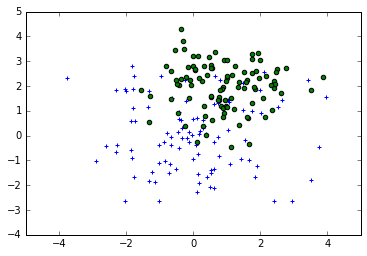

In [43]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import scipy
from sklearn import svm


mu_vec1 = np.array([0,0])
cov_mat1 = np.array([[2,0],[0,2]])
x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, 100)
mu_vec1 = mu_vec1.reshape(1,2).T # to 1-col vector

mu_vec2 = np.array([1,2])
cov_mat2 = np.array([[1,0],[0,1]])
x2_samples = np.random.multivariate_normal(mu_vec2, cov_mat2, 100)
mu_vec2 = mu_vec2.reshape(1,2).T


fig = plt.figure()


plt.scatter(x1_samples[:,0],x1_samples[:,1], marker='+')
plt.scatter(x2_samples[:,0],x2_samples[:,1], c= 'green', marker='o')

X = np.concatenate((x1_samples,x2_samples), axis = 0)
Y = np.array([0]*100 + [1]*100)

C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel = 'rbf',  gamma=0.7, C=C )
clf.fit(X, Y)

In [44]:
clf.coef_[0]

ValueError: coef_ is only available when using a linear kernel